## Fine Tuning--Keras Tuner
While building a deep neural network the common problems we generally face are:   


*   How many filters should be in each layer of a deep neural network ?
*   What should be the filter size (3*3 or 5*5 or ...) ?
*   Selection of Optimizer
*   Selection of Learning rate 
*   How to tune Dropout level (0.1 or 0.2 or ...) ?

## Key Requirements:
* tensorflow 2.0 or above 
* Installed keras tuner

In [1]:
# Install keras tuner
!pip install keras-tuner

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=801ba9d7d2f288716a9456d9b7e25c014a07606c35016f37d7a90345f638f194
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=2a3f549f58e0742b01efb057bc33d1d60dbfc2192a8db1c9a626149a91ce2501
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


### Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [9]:
# Load Fashion MNIST Dataset

mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It is available in keras api. Each training and test example is assigned to one of the following labels:
*  0 T-shirt/top
*  1 Trouser
*  2 Pullover
*  3 Dress
*  4 Coat
*  5 Sandal
*  6 Shirt
*  7 Sneaker
*  8 Bag
*  9 Ankle boot

### Normalizing images

In [10]:
train_images = train_images/255
test_images = test_images/255

### Let's plot an image from training set

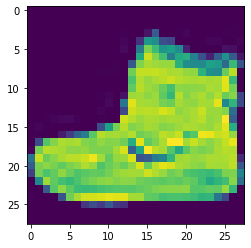

In [20]:
plt.imshow(train_images[0])

In [21]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

### Reshape Training and Test images into 3-dimension (28,28,1)

In [22]:
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [23]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Let's Define a function to tune the deep neural network

In [24]:
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(hp.Int('Conv1_filter', min_value=32, max_value=256, step=32), #To tune the number of filters (argument "step" is the step size)
                        hp.Choice('Conv1_filtersize', values=[3,5]),  #To tune shape of filter
                       activation='relu',
                       input_shape=(28,28,1)),
        
        keras.layers.Conv2D(hp.Int('Conv2_filter', min_value=32, max_value=512, step=32),
                        hp.Choice('Conv2_filtersize', values=[3,5]),
                       activation='relu'),
        
        keras.layers.Dropout(hp.Choice('Dropout_1', values=[0.0, 0.10,0.20, 0.30, 0.40])),  #To tune the level of dropout

        keras.layers.MaxPooling2D(2,2), 
    
        keras.layers.Flatten(),
        keras.layers.Dense(hp.Int('Dense1', min_value=128, max_value=512, step=32),
                          activation='relu'),
        keras.layers.Dropout(hp.Choice('Dropout_1', values=[0.0, 0.10,0.20, 0.30, 0.40])),
        
        keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),  #To tune the learning rate
                 loss='sparse_categorical_crossentropy',
                 metrics= ['accuracy'])
    
    return model

In [25]:
# Initialize RandomSearch
tuner_search = RandomSearch(build_model,    #callable that takes hyperparameters and returns a Model instance
                            objective='val_accuracy',   #String. Name of model metric to minimize or maximize
                            max_trials=5,   #Total number of trials
                            directory='output')   #To save checkpoints

In [26]:
tuner_search.search(train_images, train_labels, epochs=3, validation_split=0.15)

Epoch 1/3
1594/1594 [==============================] - 48s 30ms/step - loss: 0.4189 - accuracy: 0.8498 - val_loss: 0.3452 - val_accuracy: 0.8939
Epoch 2/3
1594/1594 [==============================] - 47s 30ms/step - loss: 0.2845 - accuracy: 0.8952 - val_loss: 0.3004 - val_accuracy: 0.8972
Epoch 3/3
1594/1594 [==============================] - 47s 30ms/step - loss: 0.2355 - accuracy: 0.9117 - val_loss: 0.2405 - val_accuracy: 0.9160


Epoch 1/3
1594/1594 [==============================] - 28s 18ms/step - loss: 0.3811 - accuracy: 0.8627 - val_loss: 0.3005 - val_accuracy: 0.8888
Epoch 2/3
1594/1594 [==============================] - 28s 18ms/step - loss: 0.2451 - accuracy: 0.9077 - val_loss: 0.2324 - val_accuracy: 0.9138
Epoch 3/3
1594/1594 [==============================] - 28s 18ms/step - loss: 0.1913 - accuracy: 0.9288 - val_loss: 0.2327 - val_accuracy: 0.9191


Epoch 1/3
1594/1594 [==============================] - 62s 39ms/step - loss: 0.5093 - accuracy: 0.8372 - val_loss: 0.3603 - val_accuracy: 0.8677
Epoch 2/3
1594/1594 [==============================] - 62s 39ms/step - loss: 0.3329 - accuracy: 0.8781 - val_loss: 0.3420 - val_accuracy: 0.8770
Epoch 3/3
1594/1594 [==============================] - 62s 39ms/step - loss: 0.2952 - accuracy: 0.8892 - val_loss: 0.3421 - val_accuracy: 0.8788


Epoch 1/3
1594/1594 [==============================] - 18s 11ms/step - loss: 0.6264 - accuracy: 0.7717 - val_loss: 0.5050 - val_accuracy: 0.8202
Epoch 2/3
1594/1594 [==============================] - 18s 11ms/step - loss: 0.5006 - accuracy: 0.8129 - val_loss: 0.4762 - val_accuracy: 0.8234
Epoch 3/3
1594/1594 [==============================] - 18s 11ms/step - loss: 0.4797 - accuracy: 0.8215 - val_loss: 0.5120 - val_accuracy: 0.8172


Epoch 1/3
1594/1594 [==============================] - 37s 23ms/step - loss: 0.6350 - accuracy: 0.7971 - val_loss: 0.3998 - val_accuracy: 0.8501
Epoch 2/3
1594/1594 [==============================] - 37s 23ms/step - loss: 0.4584 - accuracy: 0.8308 - val_loss: 0.4270 - val_accuracy: 0.8498
Epoch 3/3
1594/1594 [==============================] - 37s 23ms/step - loss: 0.4395 - accuracy: 0.8382 - val_loss: 0.4194 - val_accuracy: 0.8572


INFO:tensorflow:Oracle triggered exit


Now the best model with the optimum value of various parameters can be selected to achieve higher accuracy value.

### Select the best parameter for your model using "get_best_models"

In [27]:
model = tuner_search.get_best_models(num_models=1)[0]  #Models are available in the form of list

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 192)       1920      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        307264    
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 384)               2974080   
_________________________________________________________________
dropout_1 (Dropout)          (None, 384)               0

### Train the model for more number of epochs so that it can learn more

In [29]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.15, initial_epoch=3)

Epoch 4/10
1594/1594 [==============================] - 28s 18ms/step - loss: 0.1458 - accuracy: 0.9453 - val_loss: 0.2621 - val_accuracy: 0.9134
Epoch 5/10
1594/1594 [==============================] - 28s 18ms/step - loss: 0.1146 - accuracy: 0.9569 - val_loss: 0.2367 - val_accuracy: 0.9221
Epoch 6/10
1594/1594 [==============================] - 28s 18ms/step - loss: 0.0890 - accuracy: 0.9671 - val_loss: 0.3105 - val_accuracy: 0.9118
Epoch 7/10
1594/1594 [==============================] - 28s 18ms/step - loss: 0.0676 - accuracy: 0.9751 - val_loss: 0.2903 - val_accuracy: 0.9220
Epoch 8/10
1594/1594 [==============================] - 28s 17ms/step - loss: 0.0547 - accuracy: 0.9803 - val_loss: 0.3207 - val_accuracy: 0.9232
Epoch 9/10
1594/1594 [==============================] - 28s 18ms/step - loss: 0.0485 - accuracy: 0.9825 - val_loss: 0.3534 - val_accuracy: 0.9263
Epoch 10/10
1594/1594 [==============================] - 28s 18ms/step - loss: 0.0364 - accuracy: 0.9875 - val_loss: 0.3805 

### Prediction on Test images

In [32]:
prediction = model.predict(test_images)
prediction = np.argmax(prediction, axis=1)

In [33]:
prediction

array([9, 2, 1, ..., 8, 1, 5])

### Let's check the model accuracy on test images

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(test_labels, prediction)

0.9155

## It's Your Turn Now :)
## Upvote if you like this Notebook 